In [1]:
from simulator import Simulator
from scipy import stats
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 7.5)})

#### Description

The input of the BRC simualtor includes the following part:

1. transaction_generator，a generator function which should generate a random transacion upon calling. The return value should a tuple of transaction amount, transaction fee (absolute value instead of percentage) and interarrival time.
2. mu_generator，a generator function which should return a interarrival time for block generation event.
3. K, maximum size of a blcok.

After defining the simulator object, invoke 'run' function to start simulation. User can specify the simulation length (duration), and warm up time. Then 'plot' function can be invoked to draw trends.

### Run 1

| Key  | Value  | Distribution |
|:------------- |:---------------:| -------------:|
| Transaction rate    | 120 / hr |   Poission |
| Transaction amount      | 5 - 25        |     Uniform |
| Transaction fee percentage | 1% or 2%        |  Binomial |
| Block generation rate | 30 / hr        |    Poission |
| Maximum block size | 10        |    None |
| Running time | 5000        |    None |
| Warm up | 1000        |    None |


In [2]:
def transaction_generator():
    """
    Define a transaction generator, it should return 3 value, the transaction amount, fee 
    and an inter-arrival time. Notice that the unit for time is minute.
    """
    # Uniform transaction amount between 5, 25.
    amount = stats.uniform.rvs() * 20 + 5
    # Binomial transaction fee of 1% * amount or 2% * amount
    fee = amount * (stats.binom.rvs(1, 0.5) / 100 + 0.01)
    # Exponential inter-arrival time of 2 transaction / minute
    inter_arrival_time = stats.expon.rvs(scale = 0.5)
    return amount, fee, inter_arrival_time

def mu_generator():
    """
    Define a block event generator, it should return a random value of an inter-arrival time for block
    generation.
    """
    # Exponential inter-arrival time of 0.5 block / minute
    return stats.expon.rvs(scale = 2)

simulator = Simulator(transaction_generator, mu_generator, K=10)
simulator.run(duration=5000, warm_up=1000, verbose=True)

Simulated 10000 events at time 3996.17239927...
Simulation finished
Simulated 12443 events, last 1.8 seconds, average speed is 6787.914 events/s


The following plot is supported：
'all_transaction_amount', 'all_transaction_count',
'all_transaction_fee', 'block', 'delay', 'finished_transaction_amount',
'finished_transaction_count', 'finished_transaction_fee',
'pending_transaction_amount', 'pending_transaction_count',
'pending_transaction_fee', 'average_delay',
'average_transaction_amount', 'average_transaction_fee',
'average_pending_transaction_amount', 'average_pending_transaction_fee',
'average_finished_transaction_amount',
'average_finished_transaction_fee', 'average_block_size',
'average_block_amount', 'average_block_fee'

## Inspect the result

#### What is the distribution of transaction amount?

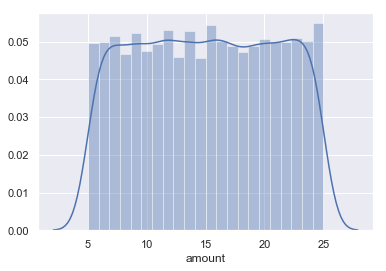

In [3]:
simulator.transaction_plot('amount')

#### What is the relationship between transaction amount and transaction fee?

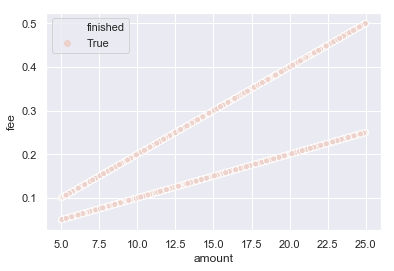

In [4]:
simulator.transaction_plot('amount', 'fee')

#### What is the distribution of transactions' create time?

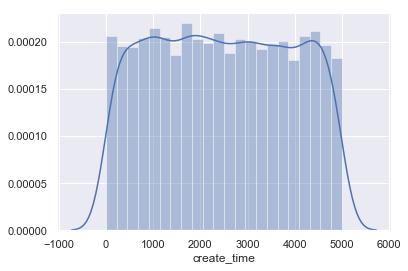

In [5]:
simulator.transaction_plot('create_time')

#### What is the relationship between transaction fee and pending time?

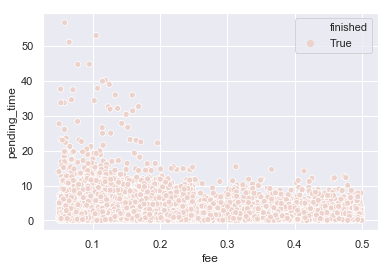

In [6]:
simulator.transaction_plot('fee', 'pending_time')

#### What is the average delay time over time

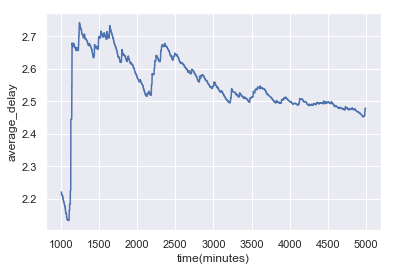

In [7]:
simulator.plot('average_delay')

#### What is the average queue length?

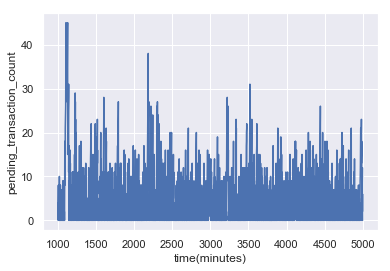

In [8]:
simulator.plot('pending_transaction_count')

#### What is average block size over time?

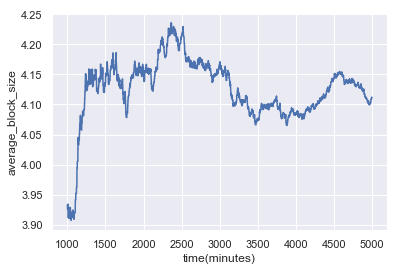

In [9]:
simulator.plot('average_block_size')

#### What is the average transaction fee in a block?

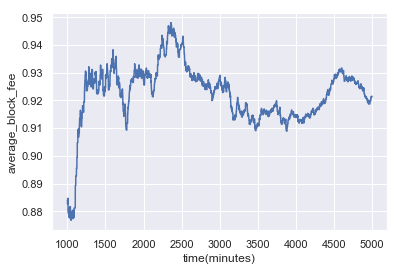

In [10]:
simulator.plot('average_block_fee')

#### What is the average earning of all miners per minute?

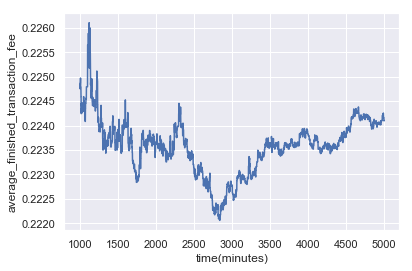

In [11]:
simulator.plot('average_finished_transaction_fee')